<a href="https://colab.research.google.com/github/maissabouaouaja/Bard-Chatbot/blob/main/Copie_de_classificationcv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import essential libraries
import numpy as np  # For linear algebra operations
import pandas as pd  # For data processing and reading CSV files
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced data visualization
import re  # For regular expressions operations
from nltk.corpus import stopwords  # For removing stopwords from text data
from sklearn.preprocessing import LabelEncoder  # For encoding labels
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neighbors import KNeighborsClassifier  # For the KNN classifier
from sklearn.metrics import accuracy_score  # For evaluating model accuracy

import os  # For operating system dependent functionality


In [ ]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.sample(5)

,Category,Resume
686,PMO,AREA OF EXPERTISE (PROFILE) Around 10 plus yea...
62,HR,TECHNICAL SKILLS â¢ Typewriting â¢ TORA â¢ ...
251,Sales,SKILLS 1. MS-Office 2. Good Communication skil...
354,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja..."
98,Advocate,SKILLS â¢ Knows English as native speaker (IE...


In [ ]:
# Showing if has null values
print('Count of null values from category column:', df['Category'].isnull().sum())
print('Count of null values from resume column:', df['Resume'].isnull().sum(), '\n')

# Data information
print(df.info(), '\n')

# A dinamic statistic
print(df.describe())

Count of null values from category column: 0
Count of null values from resume column: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None 

              Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18


In [ ]:
df.shape

(962, 2)

In [ ]:
df["Category"].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

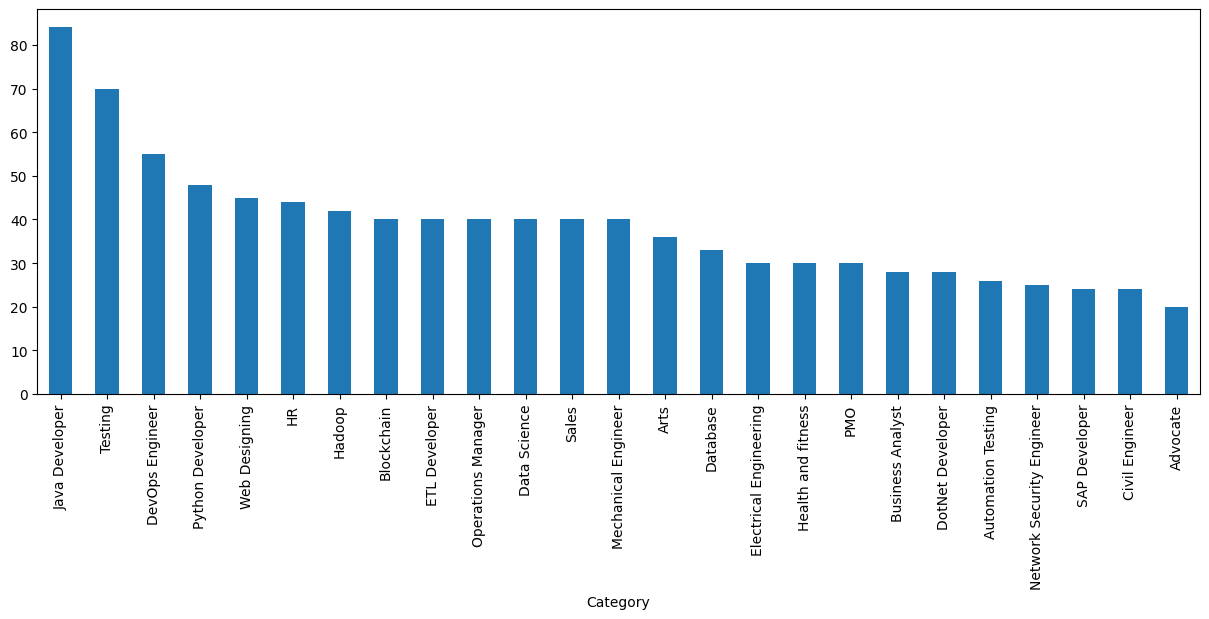

In [ ]:
# Set the size of the plot
plt.figure(figsize=(15,5))

# Count the number of resumes in each category and plot a bar chart
df["Category"].value_counts().plot(kind="bar")

# Display the plot
plt.show()

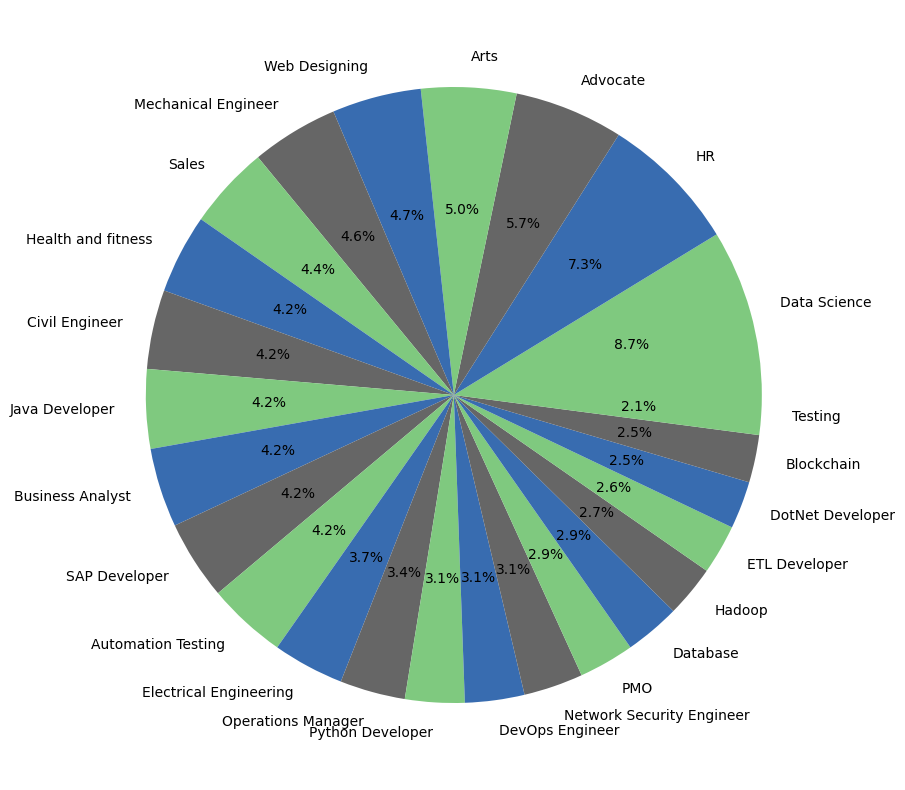

In [ ]:
counts = df["Category"].value_counts()
labels = df["Category"].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=plt.cm.Accent(np.linspace(0,1,3)))
plt.show()

<ipython-input-38-1cd39ede85bf>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




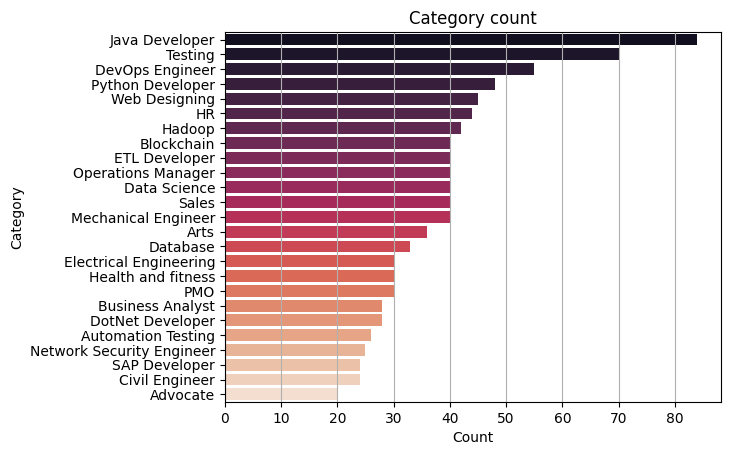

In [ ]:
# Bar plot was made to see better numbers above
x_barplot = df['Category'].value_counts().to_list()
y_barplot = df['Category'].value_counts().index.to_list()

barplot_amount_values = sns.barplot(x=x_barplot,
                                    y=y_barplot,
                                    palette="rocket") # Color: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title('Category count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True, 'major', 'x')
plt.show()

In [ ]:
# Getting job that are tech area
list_tech = ['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
             'Web Designing', 'ETL Developer', 'Data Science', 'SAP Developer',
             'Network Security Engineer', 'Automation Testing', 'DotNet Developer',
             'Hadoop', 'Database', 'Blockchain']

# Created a new column called 'Category Area', that identify if resume does part from certain category
df['Category Area'] = None
df['Category Area'] = df['Category'].apply(lambda category: 'Tech' if category in list_tech else 'Others')

# Sorting columns
df = df.reindex(columns=['Category', 'Category Area', 'Resume'])
df.head()

,Category,Category Area,Resume
0,Data Science,Tech,Skills * Programming Languages: Python (pandas...
1,Data Science,Tech,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,Tech,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Tech,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
import plotly.express as px

fig = px.pie(df, names='Category', title='Data distribution',
             color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(height=400, width=400)
fig.show()


In [ ]:
# Here was made a visualization more deeper, to see distribution of category area (tech or others)
df_1 = df[df['Category Area'] == 'Tech']
df_2 = df[df['Category Area'] == 'Others']

fig_1 = px.pie(df_1, names='Category', title='Tech category distribution',
               color_discrete_sequence=px.colors.qualitative.D3) # Color: https://plotly.com/python/discrete-color/

fig_2 = px.pie(df_2, names='Category', title='Others category distribution',
               color_discrete_sequence=px.colors.qualitative.D3)

fig_1.show()
print('')
fig_2.show()

In [ ]:
# Here we can see that resumes are duplicates
len_df = len(df)
len_df_resume_uni = len(df['Resume'].unique())
porc_no_duplicate = round(len_df_resume_uni/len_df, 2)

print(len_df, 'is the lenght of lines')
print(len_df_resume_uni, 'are uniques')
print(f'{porc_no_duplicate}% of data aren´t duplicates \n')

# The text has invalid char, then these invalid char can be present in others datas
df['Resume'][3]

962 is the lenght of lines
166 are uniques
0.17% of data aren´t duplicates 



"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

In [ ]:
def clean(text):
    """
    Clean the input text by removing URLs, emails, special characters, and stop words.

    :param text: The string to be cleaned
    :return: The cleaned string
    """

    # Compile patterns for URLs and emails to speed up cleaning process
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

    # Remove URLs
    clean_text = url_pattern.sub('', text)

    # Remove emails
    clean_text = email_pattern.sub('', clean_text)

    # Remove special characters (keeping only words and whitespace)
    clean_text = re.sub(r'[^\w\s]', '', clean_text)

    # Remove stop words by filtering the split words of the text
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in clean_text.split() if word.lower() not in stop_words)

    return clean_text

In [ ]:

# Insert this method to clear output when have finished
from IPython.display import clear_output

# Getting unique resumes
unique_resume = df['Resume'].unique().tolist()

# Here it was done an exploration of resume, to find invalid chars
def resume_exp(unique_resume):
  num = 0
  for resume in unique_resume:
      print(num)
      print(resume)
      time.sleep(0.5) # Inserted this line, to try fix a error, basically sometimes output not appear

      inp = input()
      if inp == '':
          clear_output()
          num += 1
      else:
          clear_output()
          break

# Commented to not execute, uncomment to execute function
# resume_exp(unique_resume) # Insert any char to stop loop and press enter to continue

In [ ]:
# Invalid char collected, to take off
import string
invalid_char = ['â¢', 'âª', 'â', 'ï', 'ï', 'ï·',
                'Â', 'Ã¼', 'Ã¼Â', 'Ã±', 'ÃÂ', '·', '*'] # '   ' whitespace

# Taking off invalid chars from resume
def clean_resume(text):
    text = re.sub('[^\x00-\x7f]', ' ', text) # https://stackoverflow.com/questions/20889996/how-do-i-remove-all-non-ascii-characters-with-regex-and-notepad no ascii
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s+', ' ', text) # Remove whitespace
    text = re.sub(('[%s]' % re.escape(string.punctuation)), ' ', text) # https://medium.com/geekculture/how-to-remove-punctuation-from-text-in-python-7c8790bac4bd
    return text

df['Processed Resume'] = df['Resume'].apply(lambda x: clean_resume(x))


In [ ]:
import random

# Here we got random numbers to verify random samples of resumes, to see if processing is correct
for _ in range(10):
    print(random.randint(0, len(df) - 1))

845
649
7
146
430
107
872
392
2
329


In [ ]:
random_number = 580
df['Resume'][random_number]

'â\x80¢ Operating Systems: Windows â\x80¢ Others: MS Excel, MS Office, MS Power Point Key Projects Handled Project Title: fruit sorting and disease detection Client: Kranti Dynamics Team Size: 5 Education Details \r\nJanuary 2014 B.E. Electronics Mumbai, Maharashtra University of Mumbai\r\nPython Developer/analyst \r\n\r\npython developer and data analyst\r\nSkill Details \r\npython scripting,programming,developing- Exprience - 12 months\r\nfrontend  ,html- Exprience - 12 months\r\npython liabrary, numpy,pandas,matplolib,requests,beautiful soap- Exprience - 12 months\r\nmysql- Exprience - 12 months\r\ndjango- Exprience - 12 months\r\nweb scrapping- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Ace The Power of 5\r\ndescription - The Accountabilities:\r\n\r\nâ\x86\x92 Understanding the functional requirements of the application given by the client.\r\n\r\nâ\x86\x92 Participated in walkthroughs of business requirements, functional requirements and technical design to e

In [ ]:
df['Processed Resume'][random_number]

' Operating Systems  Windows Others  MS Excel  MS Office  MS Power Point Key Projects Handled Project Title  fruit sorting and disease detection Client  Kranti Dynamics Team Size  5 Education Details January 2014 B E  Electronics Mumbai  Maharashtra University of Mumbai Python Developer analyst python developer and data analyst Skill Details python scripting programming developing  Exprience   12 months frontend  html  Exprience   12 months python liabrary  numpy pandas matplolib requests beautiful soap  Exprience   12 months mysql  Exprience   12 months django  Exprience   12 months web scrapping  Exprience   Less than 1 year monthsCompany Details company   Ace The Power of 5 description   The Accountabilities  Understanding the functional requirements of the application given by the client  Participated in walkthroughs of business requirements  functional requirements and technical design to ensure their testability  Responsible for Software Configuration Management of project delive

In [ ]:
# Was found a pattern in text, so let´s explore it
num = 0
for i in unique_resume:
  if 'Skill Details' in i:
    num += 1

print(num, '\n')
df['Processed Resume'][3]


166 



'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C  Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management   Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru  Karnataka New Horizon College of Engineering  Bangalore Visvesvaraya Technological University Data Science Consultant Consultant   Deloitte USI Skill Details LINEAR PROGRAMMING  Exprience   6 months RETAIL  Exprience   6 months RETAIL MARKETING  Exprience   6 months SCM  Exprience   6 months SQL  Exprience   Less than 1 year months Deep Learning  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Python  Exprience   Less than 1 year months R  Exprience   Less than 1 year monthsCompany Details company   Deloitte USI description   The project inv

In [ ]:
# It was realized that all resumes have the text 'Skill Details'
# Above this text 'Skill Details' in any resume has education and current job person
# Below has all experience person
# Basically the cells bellow will get these texts ('Experience', 'Current Job', 'Education')

df['Experience'] = df['Processed Resume'].apply(lambda x: (x.split("Skill Details", 1)[1]))

df['Current Job'] = None
df['Education'] = None

for i in range(0, len(df)):
  educ_and_job = df['Resume'].iloc[i].split('Skill Details', 1)[0]
  educ_and_job_lines = educ_and_job.split('\n')

  df.loc[i, 'Current Job'] = clean_resume('\n'.join(educ_and_job_lines[-4:]))
  df.loc[i, 'Education'] = clean_resume('\n'.join(educ_and_job_lines[:-4]))


In [ ]:
# Here we got random numbers to verify random samples of resumes, to see if processing was correted
for _ in range(10):
  print(random.randint(0, len(df)))

760
556
407
734
30
812
310
265
742
857


In [ ]:
random_number = 509
print(df['Education'][random_number],'\n')
print(df['Current Job'][random_number], '\n')
print(df['Experience'][random_number])

Education Details July 2016 to May 2019 BE Electrical And Electronics Engineering Bhopal  Madhya Pradesh RGPV July 2012 to May 2015 Diploma in Electrical Electrical Engineering Bhopal  Madhya Pradesh Rgpv university Bhopal Matric GHS BHULI  

Electrical Engineering  

 Basic Computer  Electrical Machine  Electrical wiring  Solar power Plant  Distribution Substation  Exprience   Less than 1 year monthsCompany Details company   Enigma Business Advisor description   Solar Energy 1  Solar power plant Installation 2  Maintenance Transmission and Distribution Line 1  Installation


In [ ]:
# Verify if current job does part from category
list_1 = []
list_2 = []

for i in range(0, len(df)):
  df.loc[i, 'Category'] = df.loc[i, 'Category'].upper()
  df.loc[i, 'Current Job'] = df.loc[i, 'Current Job'].upper()

  if df.loc[i, 'Category'] in df.loc[i, 'Current Job']:
    list_1.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")
  else:
    list_2.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")

print(len(set(list(list_1)))) # list_1 or list_2

# Was realized that have 149 current jobs that does part from category
# But the others ones?
# It was realize that the rest was been part, but written with other form
# Like ("Category: DATA SCIENCE", "Current Job: Data scientist")
# It´s the same thing, but written with other form

100


In [ ]:
df.head()



,Category,Category Area,Resume,Processed Resume,Experience,Current Job,Education
0,DATA SCIENCE,Tech,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...,JAVASCRIPT Exprience 24 months jQuery Exp...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,Skills Programming Languages Python pandas...
1,DATA SCIENCE,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,Python Exprience Less than 1 year months S...,DATA SCIENTIST DATA SCIENTIST MATELABS,Education Details May 2013 to May 2017 B E UIT...
2,DATA SCIENCE,Tech,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,Data Analysis Exprience Less than 1 year m...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Areas of Interest Deep Learning Control Syste...
3,DATA SCIENCE,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,LINEAR PROGRAMMING Exprience 6 months RETA...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,DATA SCIENCE,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Hary...,Data Structure Exprience Less than 1 year ...,DATA SCIENCE INTERNSHIP,Education Details MCA YMCAUST Faridabad Hary...


In [ ]:
# Merging all into same column
# So it´s necessary create a new column
df['Final Resume'] = None

for i in range(0, len(df)):
  text_1 = f"Education: {df.loc[i, 'Education']} / "
  text_2 = f"Current Job: {df.loc[i, 'Current Job']} / "
  text_3 = f"Experience: {df.loc[i, 'Experience']}"

  df.loc[i, 'Final Resume'] = ' '.join([text_1, text_2, text_3])

# Dropping 'resume' and 'processed resume' columns, because aren´t more necessary
df = df.drop(['Resume', 'Processed Resume'], axis=1)
# Sorting values for a better visualization
df = df.reindex(columns=['Category', 'Category Area', 'Final Resume',
                         'Education', 'Current Job', 'Experience'])

display(df.head())
print('\n')
df['Final Resume'][0]

,Category,Category Area,Final Resume,Education,Current Job,Experience
0,DATA SCIENCE,Tech,Education: Skills Programming Languages Pyt...,Skills Programming Languages Python pandas...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,JAVASCRIPT Exprience 24 months jQuery Exp...
1,DATA SCIENCE,Tech,Education: Education Details May 2013 to May 2...,Education Details May 2013 to May 2017 B E UIT...,DATA SCIENTIST DATA SCIENTIST MATELABS,Python Exprience Less than 1 year months S...
2,DATA SCIENCE,Tech,Education: Areas of Interest Deep Learning Co...,Areas of Interest Deep Learning Control Syste...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Data Analysis Exprience Less than 1 year m...
3,DATA SCIENCE,Tech,Education: Skills R Python SAP HANA Tableau SA...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,LINEAR PROGRAMMING Exprience 6 months RETA...
4,DATA SCIENCE,Tech,Education: Education Details MCA YMCAUST Fari...,Education Details MCA YMCAUST Faridabad Hary...,DATA SCIENCE INTERNSHIP,Data Structure Exprience Less than 1 year ...


'Education: Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details  /  Current Job: DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ASSURANCE ASSOCIATE   ERNST   YOUNG LLP  /  Experience:  JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and

In [ ]:
# Importez le module nltk et téléchargez les mots vides (stopwords)
import nltk


nltk.download('stopwords')

# Définissez la chaîne de caractères
string = "Hello, $ % # I found this # article at https://www.example.com! You can contact me at john@example.com."

# Nettoyez la chaîne en supprimant les caractères spéciaux et les mots vides
def clean(text):
    # Supprimez les caractères spéciaux
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    # Supprimez les mots vides (stopwords)
    stopwords = nltk.corpus.stopwords.words('english')
    cleaned_words = [word for word in cleaned_text.split() if word.lower() not in stopwords]
    return ' '.join(cleaned_words)

# Affichez la chaîne nettoyée
print(clean(string))

Hello found article httpswwwexamplecom contact johnexamplecom


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(df.columns)


Index(['Category', 'Category Area', 'Final Resume', 'Education', 'Current Job',
       'Experience'],
      dtype='object')


In [ ]:
# Import des bibliothèques supplémentaires
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

# Chargement des données
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Exploration des données
average_length = df["Resume"].apply(lambda x: len(str(x).split())).mean()
print("Longueur moyenne des CV:", average_length)

# Préparation des données
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["Resume"])
y = df["Category"]

# Séparation en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définition des hyperparamètres à rechercher
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Recherche par grille pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Évaluation du modèle avec les meilleurs hyperparamètres
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

# Sauvegarde du modèle
joblib.dump(best_model, 'resume_classifier_model.pkl')


Longueur moyenne des CV: 450.49792099792097
Meilleurs hyperparamètres: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00   

['resume_classifier_model.pkl']

In [ ]:
df = df.rename(columns={'Final Resume': 'Resume'})


In [ ]:
import re
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Lire les données à partir du fichier CSV
df = pd.read_csv("UpdatedResumeDataSet.csv")

# Renommer la colonne 'Final Resume' en 'Resume' pour plus de simplicité
df = df.rename(columns={'Final Resume': 'Resume'})

def extract_skills(text):
    """
    Fonction pour extraire les compétences à partir du texte du CV.
    """
    skills = re.findall(r'[\w\-]+', text)
    return [skill.strip() for skill in skills if len(skill) > 2]

def has_skill(row, skill):
    """
    Fonction pour déterminer si un CV contient une compétence spécifique.
    """
    return int(skill.lower() in row["Skills"])

def search_resumes(df, search_term):
    """
    Fonction pour rechercher le mot saisi par l'utilisateur dans les CV et afficher les CV correspondants.
    """
    matching_resumes = df[df['Resume'].str.contains(search_term, case=False)]
    if not matching_resumes.empty:
        print(f"Le nombre de CV correspondant au mot '{search_term}' est : {len(matching_resumes)}")
        print("Les CV correspondants sont :")
        for idx, row in matching_resumes.iterrows():
            print(f"\nCV {idx + 1}:\n")
            print(row['Resume'])
            print("\n" + "-"*80 + "\n")
    else:
        print(f"Aucun CV ne contient le mot '{search_term}'.")

# Préparation des données pour le modèle de classification
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Resume'])
y = df['Category']

# Ajout des colonnes de compétences
df['Skills'] = df['Resume'].apply(extract_skills)
for skill in ["python", "sql", "machine learning", "java", "c++", "javascript", "react", "node.js", "tensorflow"]:
    df[f"Has_{skill.capitalize().replace('.', '')}_Skill"] = df.apply(lambda row: has_skill(row, skill), axis=1)

# Recherche par l'utilisateur
search_term = input("Entrez le mot à rechercher dans les CV : ")
search_resumes(df, search_term)

# Entraînement du modèle de classification
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'resume_classifier_model.pkl')

print("Le modèle de classification a été entraîné et sauvegardé.")

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
CHANGE MANAGEMENT- Exprience - 10 months
CONFIGURATION MANAGEMENT- Exprience - 10 monthsCompany Details 
company - Nendrasys Technologies Pvt Ltd
description - Date

Project Description:
The Scope of the project is to design & develop e-commerce product features for sloan project. It's a basically B2B project where customer can buy all fixers, sinks related product. It focuses on the company, the stakeholders and applications, which allow for online sales, distribution and marketing of product.

Responsibilities:
o Detailed technical Knowledge and hands-on experience on DevOps, Automation, Build Engineering and Configura -
tion Management.
o Creating fully automated CI build and deployment infrastructure and processes for multiple projects.
o Developing scripts for build, deployment, maintenance and related tasks using Jenkins.
o Installing, configuring and maintaining Continuous Integration, Automation and C

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_base.py:557: UserWarning:

cannot use tree with sparse input: using brute force

/usr/local/lib/pytho

Le modèle de classification a été entraîné et sauvegardé.


In [ ]:
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
df["Resume"] = df["Resume"].apply(lambda x: clean(x))

In [ ]:
df["Resume"][0]

'Skills Programming Languages Python pandas numpy scipy scikitlearn matplotlib Sql Java JavaScriptJQuery Machine learning Regression SVM NaÃve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3js DCjs Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV understanding Deep learningEducation Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists accelerating review process run ana

In [ ]:
# Initialize the Label Encoder
le = LabelEncoder()

# Fit the label encoder on the 'Category' column to learn the unique categories
le.fit(df["Category"])

# Transform the 'Category' column into encoded numerical values
df["Category"] = le.transform(df["Category"])

In [ ]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit the TF-IDF vectorizer on the 'Resume' column to learn the vocabulary and IDF of the words
tfidf.fit(df["Resume"])

# Transform the 'Resume' texts into a sparse matrix of TF-IDF features
resume = tfidf.transform(df["Resume"])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(resume, df["Category"], test_size=0.2, random_state=42)

In [ ]:
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
X_train.shape, y_train.shape

((769, 8043), (769,))

In [ ]:
# Initialize the KNN classifier with default parameters
clf = KNeighborsClassifier()

# Train the classifier using the training data
clf.fit(X_train, y_train)

# Predict the categories for the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# The accuracy is a float representing the proportion of correct predictions
print(f'Accuracy of the KNN classifier on test set: {accuracy:.2f}')

Accuracy of the KNN classifier on test set: 0.98


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Define a dictionary to hold models
models = {
    'KNeighborsClassifier': KNeighborsClassifier(),

}

# Dictionary to hold accuracy scores
accuracy_scores = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    # Print the accuracy
    print(f'Accuracy of {model_name} on test set: {accuracy:.2f}')

Accuracy of KNeighborsClassifier on test set: 0.98


In [ ]:
# Extraction des compétences à partir des CV
def extract_skills(text):
    """
    Fonction pour extraire les compétences à partir du texte du CV.
    """
    # Implémentez votre logique d'extraction des compétences ici
    # Cela pourrait inclure l'utilisation de techniques NLP telles que l'analyse de la partie du discours, la reconnaissance d'entités nommées, etc.
    return ["python", "machine learning", "data analysis"]  # Exemple de compétences extraites

df["Skills"] = df["Resume"].apply(extract_skills)

# Création de fonctionnalités pour les compétences
def has_skill(row, skill):
    """
    Fonction pour déterminer si un CV contient une compétence spécifique.
    """
    return int(skill.lower() in row["Skills"])

for skill in ["python"]:
    df[f"Has_{skill.capitalize()}_Skill"] = df.apply(lambda row: has_skill(row, skill), axis=1)

# Ajout de la recherche par grille pour les nouvelles fonctionnalités
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Exemple de paramètre supplémentaire lié à la recherche par compétences
}


In [ ]:
print(df.columns)


Index(['Category', 'Resume', 'Skills', 'Has_Python_Skill', 'Has_Sql_Skill',
       'Has_Machine learning_Skill', 'Has_Java_Skill', 'Has_C++_Skill',
       'Has_Javascript_Skill', 'Has_React_Skill', 'Has_Nodejs_Skill',
       'Has_Tensorflow_Skill'],
      dtype='object')


In [ ]:
import re

def extract_skills(resume):
    skills = re.findall(r'[\w\-]+', resume)
    return [skill.strip() for skill in skills if len(skill) > 2]

df['Skills'] = df['Resume'].apply(extract_skills)


In [ ]:
print(df['Skills'].apply(lambda x: str(x)).unique())


["['Skills', 'Programming', 'Languages', 'Python', 'pandas', 'numpy', 'scipy', 'scikitlearn', 'matplotlib', 'Sql', 'Java', 'JavaScriptJQuery', 'Machine', 'learning', 'Regression', 'SVM', 'NaÃve', 'Bayes', 'KNN', 'Random', 'Forest', 'Decision', 'Trees', 'Boosting', 'techniques', 'Cluster', 'Analysis', 'Word', 'Embedding', 'Sentiment', 'Analysis', 'Natural', 'Language', 'processing', 'Dimensionality', 'reduction', 'Topic', 'Modelling', 'LDA', 'NMF', 'PCA', 'Neural', 'Nets', 'Database', 'Visualizations', 'Mysql', 'SqlServer', 'Cassandra', 'Hbase', 'ElasticSearch', 'D3js', 'DCjs', 'Plotly', 'kibana', 'matplotlib', 'ggplot', 'Tableau', 'Others', 'Regular', 'Expression', 'HTML', 'CSS', 'Angular', 'Logstash', 'Kafka', 'Python', 'Flask', 'Git', 'Docker', 'computer', 'vision', 'Open', 'understanding', 'Deep', 'learningEducation', 'Details', 'Data', 'Science', 'Assurance', 'Associate', 'Data', 'Science', 'Assurance', 'Associate', 'Ernst', 'Young', 'LLP', 'Skill', 'Details', 'JAVASCRIPT', 'Exprie